# 1) Datu ielāde

In [63]:
import pandas as pd
	
data_news = pd.read_json('5cat_big.json')
data_news.head()

,title,category,body,link
0,'Rīgas Miesnieks' zīmola īpašnieks strādājis a...,bizness,"Gaļas pārstrādes uzņēmums AS ""HKScan Latvia"" ...",https://www.delfi.lv/bizness/biznesa_vide/riga...
1,Elektroenerģijas cena Latvijā sarukusi par gan...,bizness,Aizvadītajā nedēļā elektroenerģijas cenas sama...,https://www.delfi.lv/bizness/biznesa_vide/elek...
2,Lidosta 'Rīga' jūlijā apkalpojusi rekordlielu ...,bizness,"Lidosta ""Rīga"" šā gada jūliju noslēgusi ar re...",https://www.delfi.lv/bizness/biznesa_vide/lido...
3,Inflācija turpina bremzēties,bizness,"2023. gada jūlijā, salīdzinot ar 2022. gada jū...",https://www.delfi.lv/bizness/biznesa_vide/infl...
4,SPRK: 'Sadales tīkla' tarifi izvērtēti īpaši r...,bizness,Ņemot vērā iedzīvotāju publiski izskanējušās b...,https://www.delfi.lv/bizness/biznesa_vide/sprk...


In [64]:
data_news.drop(['title', 'link'], axis=1, inplace=True)
data_news.head()

,category,body
0,bizness,"Gaļas pārstrādes uzņēmums AS ""HKScan Latvia"" ..."
1,bizness,Aizvadītajā nedēļā elektroenerģijas cenas sama...
2,bizness,"Lidosta ""Rīga"" šā gada jūliju noslēgusi ar re..."
3,bizness,"2023. gada jūlijā, salīdzinot ar 2022. gada jū..."
4,bizness,Ņemot vērā iedzīvotāju publiski izskanējušās b...


In [65]:
data_news['category'].value_counts()
x = data_news['body']
y = data_news['category']

# 2) Datu priekšapstrāde

## Izveidojam funkciju datu attīrīšanai - atdalošie simboli, lielie burti, palīgvārdi.

In [66]:
import string
import json
punct = string.punctuation
stopwordsFile = open('stopwords-lv2.json', 'r', encoding="utf8")
stopwords_arr = json.load(stopwordsFile)
print(stopwords_arr)

['aiz', 'ap', 'apakš', 'apakšpus', 'ar', 'arī', 'augšpus', 'bet', 'bez', 'bija', 'biji', 'biju', 'bijām', 'bijāt', 'būs', 'būsi', 'būsiet', 'būsim', 'būt', 'būšu', 'caur', 'diemžēl', 'diezin', 'droši', 'dēļ', 'esam', 'esat', 'esi', 'esmu', 'gan', 'gar', 'iekam', 'iekams', 'iekām', 'iekāms', 'iekš', 'iekšpus', 'ik', 'ir', 'it', 'itin', 'iz', 'ja', 'jau', 'jeb', 'jebšu', 'jel', 'jo', 'jā', 'ka', 'kamēr', 'kaut', 'kolīdz', 'kopš', 'kā', 'kļuva', 'kļuvi', 'kļuvu', 'kļuvām', 'kļuvāt', 'kļūs', 'kļūsi', 'kļūsiet', 'kļūsim', 'kļūst', 'kļūstam', 'kļūstat', 'kļūsti', 'kļūstu', 'kļūt', 'kļūšu', 'labad', 'lai', 'lejpus', 'līdz', 'līdzko', 'ne', 'nebūt', 'nedz', 'nekā', 'nevis', 'nezin', 'no', 'nu', 'nē', 'otrpus', 'pa', 'par', 'pat', 'pie', 'pirms', 'pret', 'priekš', 'pār', 'pēc', 'starp', 'tad', 'tak', 'tapi', 'taps', 'tapsi', 'tapsiet', 'tapsim', 'tapt', 'tapāt', 'tapšu', 'taču', 'te', 'tiec', 'tiek', 'tiekam', 'tiekat', 'tieku', 'tik', 'tika', 'tikai', 'tiki', 'tikko', 'tiklab', 'tiklīdz', 'tik

In [67]:
import spacy

nlp = spacy.load("xx_ent_wiki_sm")

def datu_prieksapstrade(raksts):
  doc = nlp(raksts)
  tokens = []
  for token in doc:
    temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_arr and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [68]:
datu_prieksapstrade("""Visvairāk atļauju (41) plānots anulēt uzņēmumam "Alfor", kam seko "Olympic Casino Latvia" ar 36 atļaujām.""")

['visvairāk',
 'atļauju',
 '41',
 'plānots',
 'anulēt',
 'uzņēmumam',
 'alfor',
 'kam',
 'seko',
 'olympic',
 'casino',
 'latvia',
 '36',
 'atļaujām']

In [69]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dažādi vektorizācijas varianti
tfidf = TfidfVectorizer(tokenizer=datu_prieksapstrade)
count_vec = CountVectorizer(tokenizer=datu_prieksapstrade) # Countvectorizer kā BOW
count_vec_ngram = CountVectorizer(tokenizer=datu_prieksapstrade, ngram_range=(1,2)) # BOW ar ngrammām, Bag of bigrams

# 3) Modeļu apmācība / novērtēšana

## Sadalam datus 80/20

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape
# 5220 apmācības dati un 1306 testa dati

((5220,), (1305,))

## Apmācības process, statistika, pārbaudes ar piemēriem

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from pathlib import Path
import pickle


def fitKlasifikatoram(vectorizer, classifier):
	clf = Pipeline([('vectorizer',vectorizer), ('classifier',classifier)])
	clf.fit(x_train, y_train)
	return clf

def metrikasIzvade(clf, title, test_vector):
	y_pred = clf.predict(test_vector)
	cm = confusion_matrix(y_test, y_pred)
	accuracy_4dig = round(accuracy_score(y_test, y_pred), 4)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot()
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=3))
	#Saglabājam cik veiksmīga bijusi klasifikācija, tabulu tālāk liksim iekš darba
	clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
	filenameCsv = title + '_'+ str(accuracy_4dig) + '.csv'
	filenamePickle= title + '_'+ str(accuracy_4dig) + '.sav'
	clsf_report.to_csv(Path(".") / 'metrics' / filenameCsv, index= True)
	#Saglabājam modeli
	with open(Path(".") / 'models' / filenamePickle, 'wb') as f:
		pickle.dump(clf, f)

def fitArMetrikasIzvadi(vectorizer, classifier, title):
	clf = fitKlasifikatoram(vectorizer, classifier)
	metrikasIzvade(clf, title, x_test)

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.940     0.940     0.940       233
    criminal      0.972     0.988     0.980       242
    izklaide      0.977     0.989     0.983       261
    politika      0.954     0.934     0.944       332
      sports      0.987     0.987     0.987       237

    accuracy                          0.966      1305
   macro avg      0.966     0.967     0.967      1305
weighted avg      0.965     0.966     0.965      1305



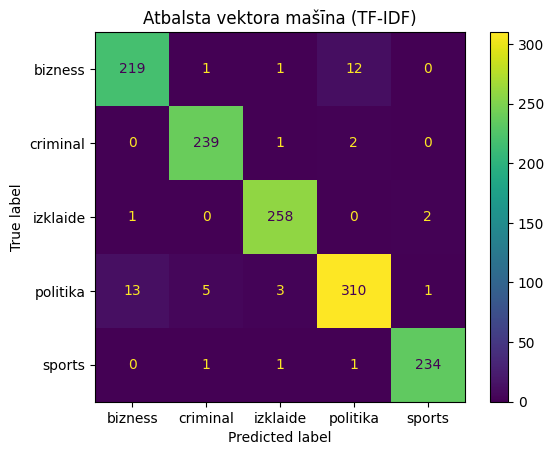

In [84]:
fitArMetrikasIzvadi(tfidf, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.938     0.781     0.852       233
    criminal      0.986     0.884     0.932       242
    izklaide      0.992     0.946     0.969       261
    politika      0.773     0.967     0.859       332
      sports      0.991     0.962     0.976       237

    accuracy                          0.913      1305
   macro avg      0.936     0.908     0.918      1305
weighted avg      0.926     0.913     0.915      1305



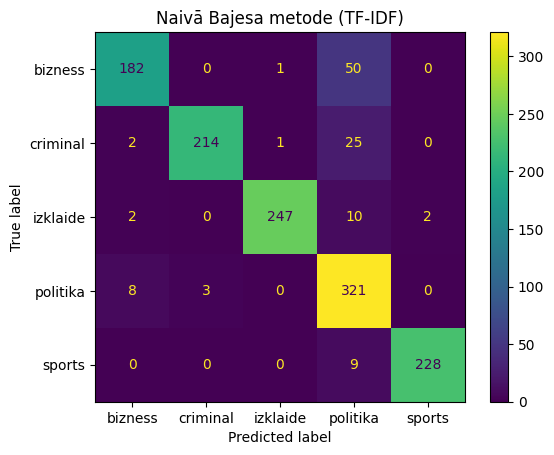

In [85]:
fitArMetrikasIzvadi(tfidf, MultinomialNB(), "Naivā Bajesa metode (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.936     0.936     0.936       233
    criminal      0.963     0.971     0.967       242
    izklaide      0.970     0.985     0.977       261
    politika      0.945     0.937     0.941       332
      sports      0.991     0.979     0.985       237

    accuracy                          0.960      1305
   macro avg      0.961     0.961     0.961      1305
weighted avg      0.960     0.960     0.960      1305



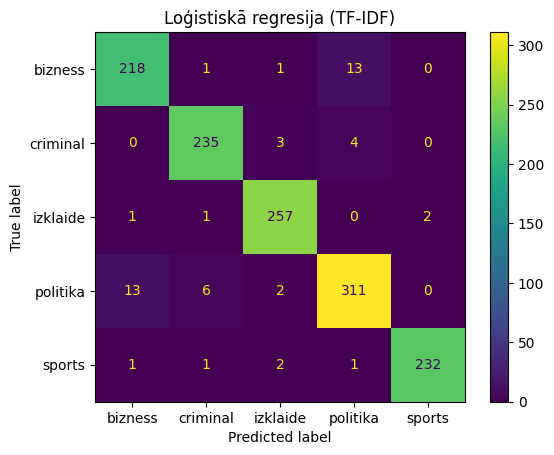

In [86]:
fitArMetrikasIzvadi(tfidf, LogisticRegression(), "Loģistiskā regresija (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.779     0.773     0.776       233
    criminal      0.845     0.876     0.860       242
    izklaide      0.823     0.820     0.821       261
    politika      0.807     0.795     0.801       332
      sports      0.860     0.857     0.858       237

    accuracy                          0.822      1305
   macro avg      0.823     0.824     0.823      1305
weighted avg      0.822     0.822     0.822      1305



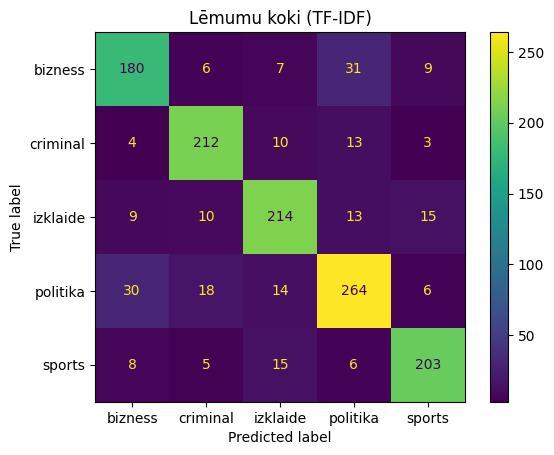

In [87]:
fitArMetrikasIzvadi(tfidf, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.930     0.914     0.922       233
    criminal      0.951     0.971     0.961       242
    izklaide      0.969     0.966     0.967       261
    politika      0.937     0.934     0.935       332
      sports      0.979     0.983     0.981       237

    accuracy                          0.952      1305
   macro avg      0.953     0.954     0.953      1305
weighted avg      0.952     0.952     0.952      1305



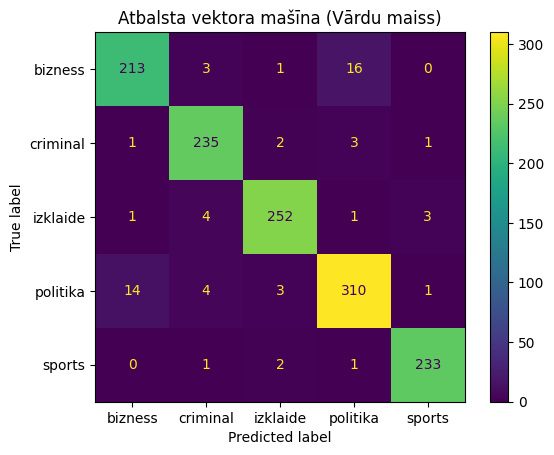

In [88]:
fitArMetrikasIzvadi(count_vec, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.927     0.923     0.925       233
    criminal      0.937     0.975     0.955       242
    izklaide      0.969     0.962     0.965       261
    politika      0.948     0.928     0.938       332
      sports      0.979     0.979     0.979       237

    accuracy                          0.952      1305
   macro avg      0.952     0.953     0.952      1305
weighted avg      0.952     0.952     0.952      1305



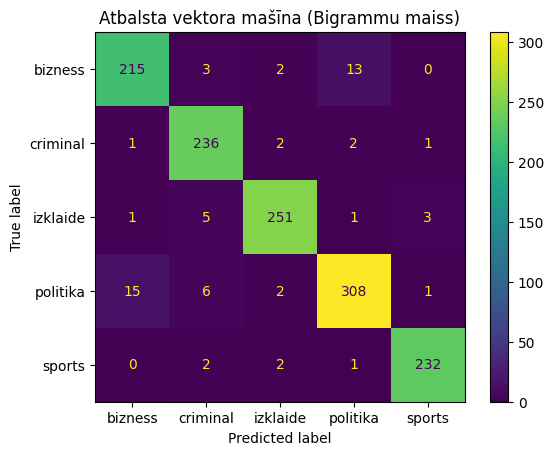

In [89]:
fitArMetrikasIzvadi(count_vec_ngram, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss)")

In [90]:
# Sporta raksts
fittedSVC = pickle.load(open("models/Atbalsta vektora mašīna (TF-IDF)_0.966.sav", 'rb'))
fittedSVC.predict(["""Latvijas basketbola izlase otrdien Džakartā ar smagu zaudējumu piedzīvoja pirmo zaudējumu Pasaules kausa vēsturē, H grupas pēdējās kārtas spēlē ar 75:101 (23:13, 19:30, 15:24, 18:34) piekāpjoties teicami otro puslaiku aizvadījušajai Kanādai.

Latvija uzvarēja pirmo ceturtdaļu ar 10 punktu pārsvaru, bet atlikušajās 30 minūtēs piekāpās ar 52:88. Pēc pirmā puslaika Latvijai bija viena punkta deficīts, bet otro puslaiku Latvija zaudēja ar 33:58."""])

array(['sports'], dtype=object)

In [91]:
# Politikas raksts
fittedSVC.predict(["""Lēmumi par kontrolpunktu slēgšanu uz Lietuvas robežas ar Baltkrieviju tiks pieņemti, ja tiks konstatēts apdraudējums, kas atbildīs kritērijiem, ko noteiks starpinstitūciju darba grupa, otrdien paziņoja Lietuvas iekšlietu viceministrs Vitālijs Dmitrijevs.

"Vienojāmies, ka, lai turpinātu slēgt robežkontroles punktus vai ierobežotu to darbību, nosakot noteiktas stundas, lai kontrolpunkts, piemēram, strādātu līdz pulksten 20 vai pulksten 18, acīmredzot ir nepieciešams visu kopīgs viedoklis," pēc vairāku ministriju, robežsardzes un citu dienestu pārstāvju tikšanās aģentūrai BNS sacīja Dmitrijevs."""])

array(['politika'], dtype=object)

# Word 2 Vec vektorizācija priekšapstrādē

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.897     0.901     0.899       233
    criminal      0.939     0.946     0.942       242
    izklaide      0.962     0.969     0.966       261
    politika      0.911     0.895     0.903       332
      sports      0.966     0.970     0.968       237

    accuracy                          0.934      1305
   macro avg      0.935     0.936     0.936      1305
weighted avg      0.934     0.934     0.934      1305



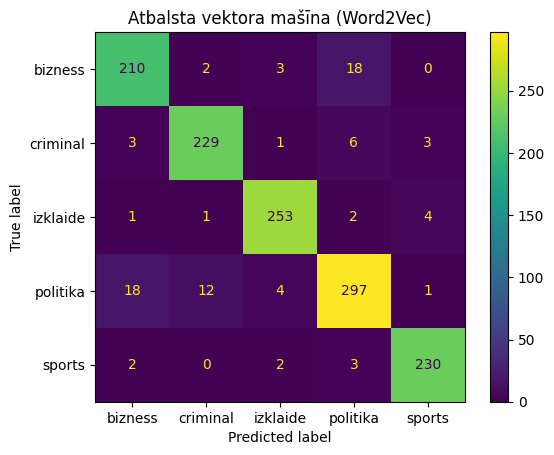

In [92]:
from gensim.models import Word2Vec
import numpy as np

x_train_w2v= x_train.apply(datu_prieksapstrade)
x_test_w2v= x_test.apply(datu_prieksapstrade)

w2v_model = Word2Vec(x_train_w2v, vector_size=100, window=5, min_count=5, workers=4)
def vectorize(teksts):
    vardu_vekt = [w2v_model.wv[vards] for vards in teksts if vards in w2v_model.wv]
    if len(vardu_vekt) == 0:
        return np.zeros(100)
    vardu_vekt = np.array(vardu_vekt)
    return vardu_vekt.mean(axis=0)


x_train_w2v = np.array([vectorize(teksts) for teksts in x_train_w2v])
x_test_w2v = np.array([vectorize(teksts) for teksts in x_test_w2v])

clfNew = LinearSVC()
clfNew.fit(x_train_w2v, y_train)
        
metrikasIzvade(clfNew, "Atbalsta vektora mašīna (Word2Vec)", x_test_w2v)